In [1]:
# Question: https://projecteuler.net/problem=313

Given $n \geq m$, we have
$$
S(m,n) = 6n+2m-13
$$

Why? The following are a few observations for choosing the optimal moves,
-  Assume that $n >= m$, i.e. the width $n$ is not smaller than the height $m$.
-  For each move, we want to move the colored block either rightward or downward.
-  If the blank block is on the left of the colored block, then moving the colored block rightward would take 5 moves, while moving the colored block downward would take 3 moves.
-  Similarly, if the blank block is on the top of the colored block, then moving the colored block rightward would take 3 moves, while moving the colored block downward would take 5 moves.
-  So, the optimal sequence of moves would be one of (rightward, downward, rightward, downward, rightward, ...) and (downward, rightward, downward, rightward, downward, ...) where rightward means moving the colored block to the right and downward means moving the colored block to the block below it. If the colored block is in the bottom row, then the only option is moving to the right blocks (this is always true since we assume width $\geq$ height).
-  Note that, since width $\geq$ height, we prefer to move the colored block to the right first (moving the block downward first would result in having one more 5-move). For example, in the $5\times4$ board example, moving downward first would take 27 moves to reach the target, while moving rightward first would take 25 moves.
So, the optimal sequence of moves is,
-  The initial step is to move the blank block to the top left corner, which takes $n+m-2$ moves.
-  After that, we need $2\times(m-1)$ pairs of (rightward, downward) for the colored block to reach the bottom row, each step takes $3$ moves.
-  Finally, we move rightward $n-m-1$ times, each step takes $5$ moves.
So,

$$
\begin{array}{ll}
S(m,n) &= n + m - 2 + 3 \times \left[2\times(m-1)\right] + 5 \times(n-m-1) \\
       &= 6n + 2m - 13
\end{array}
$$



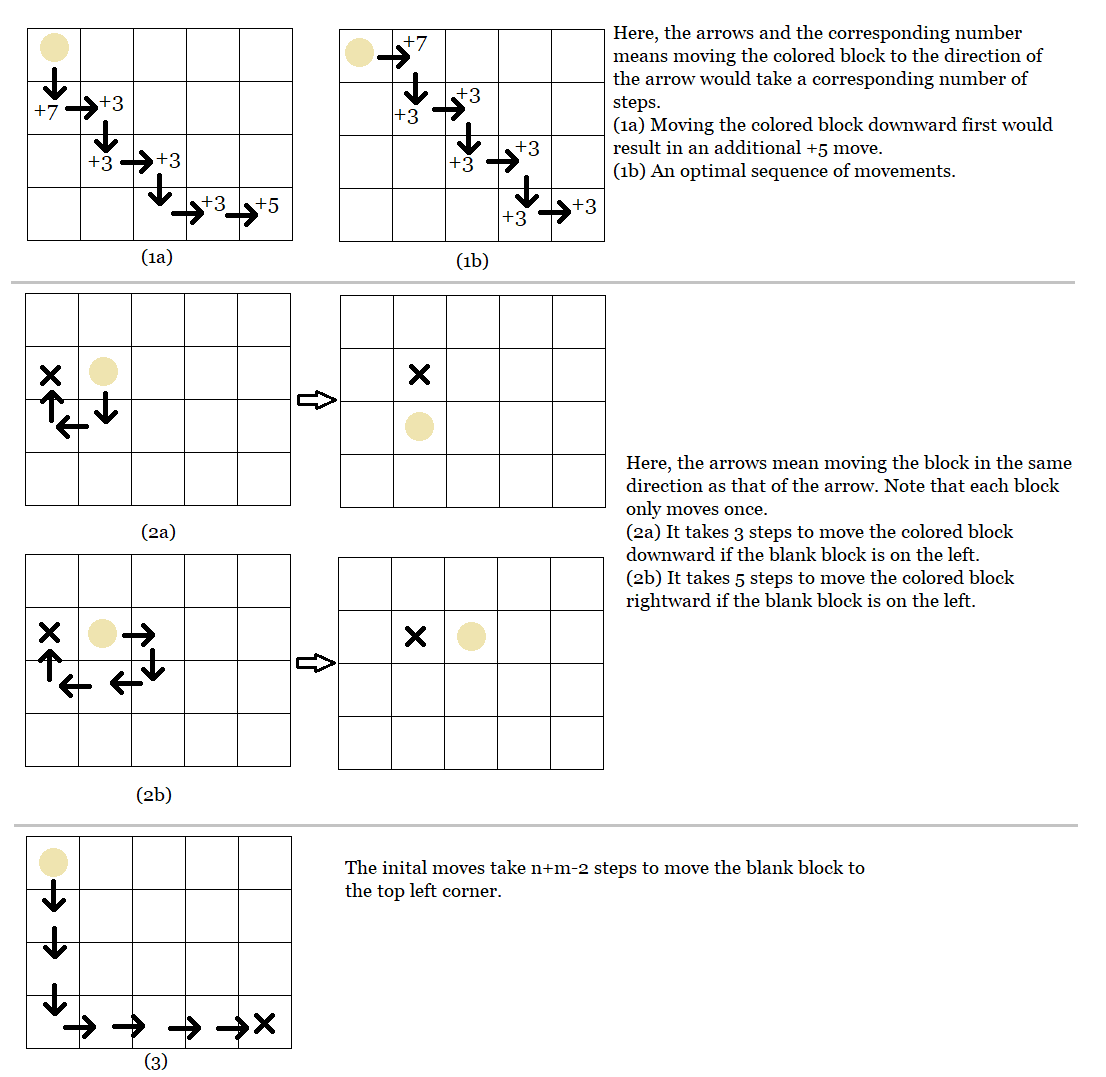

We want $S(m,n) = 6n+2m-13 = p^2$, where $p$ is a prime number and $n \geq m$. Obviously, $p \neq 2$ since $6n+2m-13$ is odd.

Let $\alpha = \frac{p^2-13}{2}$. We have that $p$ is odd, which means $p^2 - 13$ is an even number, so $\alpha$ is an integer.

Also, $\alpha = \frac{p^2-13}{2} = 3n + m$, which means,
$$
n = \frac{\alpha - m}{3}
$$

Also, we have $n$ is an integer, so $\alpha (mod 3) = m (mod 3)$.
And also, 
$n \geq m \Rightarrow 3n \geq 3m \Rightarrow 3n+m \geq 4m \Rightarrow \alpha \geq 4m \Rightarrow m \leq \frac{\alpha}{4}$.
So, for a fixed $\alpha$, we can count the number of pair of $(n,m)$ by counting the number of possible value of $m$, which can be done by counting how many values of $m$ such that $\alpha (mod 3) = m (mod 3)$ and $m \leq \frac{\alpha}{4}$. Well, if $x (mod 3) = k$, then so is $x+3$ and $x+6$ and $x+9$ and so on.

In [25]:
N = 10**6
primes = []
with open("../inputs/primes_1e6.txt", "r") as f:
    for p in f.readlines():
        next_prime = int(p.strip())
        if next_prime > N:
            break
        primes.append(next_prime)

def count_n_mod_3_equal_m(n, m):
    while not (n % 3) == m:
        n -= 1
    return (n+(3-m))//3
        
ans = 0
for prime in primes:
    if prime == 2:
        continue
    alpha = (prime**2 + 13) // 2
    count = count_n_mod_3_equal_m(alpha // 4, alpha % 3) * 2
    if alpha % 3 == 1:
        count -= 2
    ans += count
print(ans)

2057774861813004
